### 도전과제
    - 네이버 스포츠 뉴스 크롤링 제목 => wc
    - 여친선물 => wc

- 롤 관련 뉴스

In [3]:
import time, requests
import warnings
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

warnings.filterwarnings('ignore')

In [4]:
events = ['kbaseball','wbaseball','kfootball','wfootball','basketball','volleyball','golf','general']
base_url = 'https://sports.news.naver.com/'
sub_url = '/news/index?isphoto=N&page='

In [5]:
driver = webdriver.Chrome('C:/Users/YONSAI/Downloads/chromedriver.exe')
url = f'{base_url}kbaseball{sub_url}1'
driver.get(url)

In [6]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
lis = soup.select('.news_list > ul > li')
len(lis)

20

In [7]:
title = lis[0].select_one('.title').get_text().strip()
title

'역전패 최소→최다···무엇이 LG의 ‘뒷심’을 흔들었나'

In [8]:
event_dict = {}
for event in events:
    url = f'{base_url}{event}{sub_url}1'
    driver.get(url)
    time.sleep(1)

    next_clicked = 0
    while True:
        try:
            driver.find_element(By.CSS_SELECTOR, '.paginate > .next').click()
            next_clicked += 1
            time.sleep(2)
        except:
            pages = driver.find_elements(By.CSS_SELECTOR, '.paginate > a')
            num_pages = len(pages) + next_clicked * 10 if next_clicked >= 1 else len(pages) + 1
            event_dict[event] = num_pages
            break
event_dict

{'kbaseball': 3,
 'wbaseball': 2,
 'kfootball': 1,
 'wfootball': 9,
 'basketball': 2,
 'volleyball': 1,
 'golf': 2,
 'general': 2}

In [9]:
sports_title = ''
for event in event_dict.keys():
    for page in range(1, event_dict[event]+1):
        url = f'{base_url}{event}{sub_url}{page}'
        driver.get(url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        lis = soup.select('.news_list > ul > li')
        for li in lis:
            sports_title += li.select_one('.title').get_text().strip() + '\n'

In [10]:
len(sports_title.split('\n'))

352

In [11]:
driver.close()

In [12]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [13]:
okt = Okt()
tokens = okt.nouns(sports_title)            # 문장에서 명사 추출
tokens[:10]

['역전패', '최소', '최', '무엇', '의', '심', '파이어', '진화', '최지민', '좌완']

In [14]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:            # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

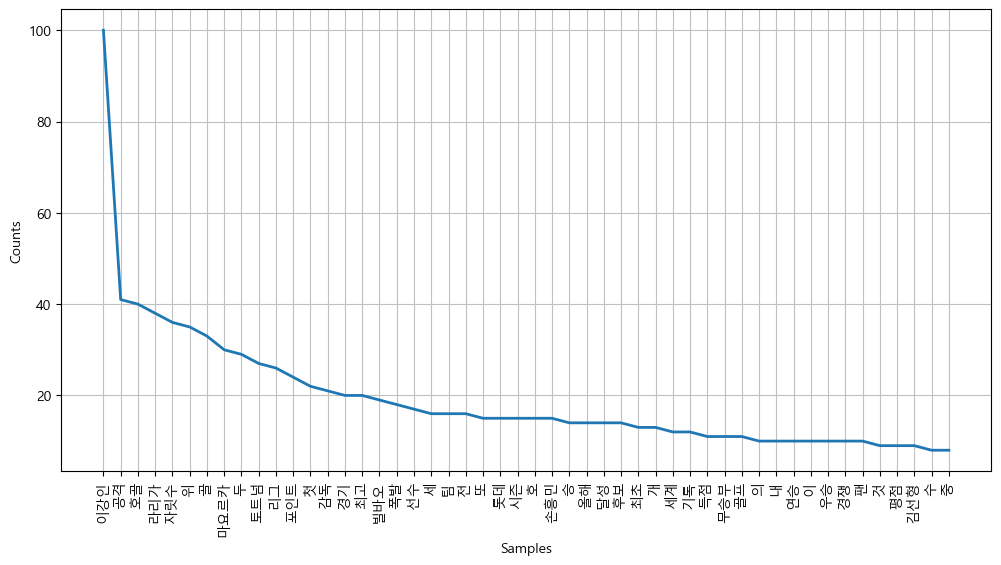

In [15]:
news = nltk.Text(new_tokens, name='스포츠 뉴스')
plt.figure(figsize=(12,6))
news.plot(50);

In [16]:
stoptext = """
    위 골 호골 경기 명 승 예비 안 팀 첫 점 환 호 입 니 등 수 두 전
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['역전패', '최소', '최', '무엇', '의', '심', '파이어', '진화', '최지민', '좌완']

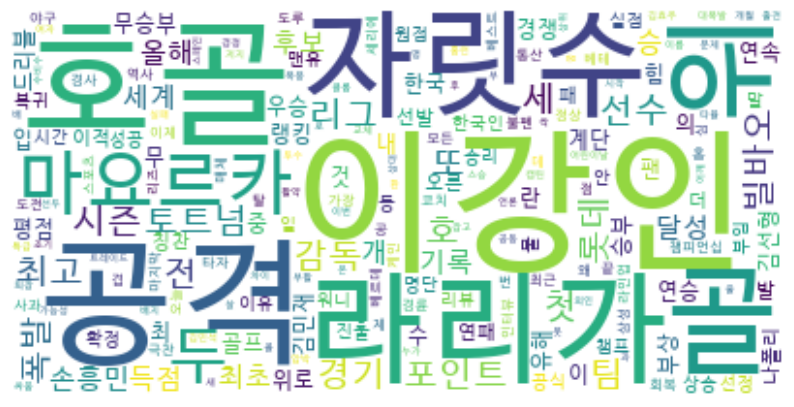

In [19]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='C:/Users/YONSAI/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc', 
    relative_scaling=0.2
).generate_from_frequencies(dict(news.vocab().most_common(300)))

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');